In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import warnings as wn
wn.filterwarnings("ignore")
from pdpbox import pdp, info_plots

import seaborn as sns
df=pd.read_csv('train.csv')

df

,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,0,0,1,5,2,0,1,569,0,0,...,2,0,0,7819,2178,5239,401,4,1,0
1,1,0,5,8,7,3,1,880,0,0,...,4,303,0,24637,5607,17635,1394,10,0,0
2,2,1,1,6,16,0,1,593,0,0,...,3,329,0,18749,3651,14834,263,7,1,0
3,3,0,1,2,0,0,1,381,0,0,...,1,0,0,12134,1739,10318,76,8,1,0
4,4,0,4,11,25,0,1,455,0,0,...,8,0,0,27891,14068,12749,1073,34,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,1,1,6,12,0,1,362,0,0,...,3,5751,0,14786,2374,12309,102,12,1,0
179996,179996,1,7,3,4,5,1,574,0,0,...,2,8907,0,11019,3933,6533,552,7,2,0
179997,179997,1,9,0,9,9,1,0,0,0,...,4,6627,0,14279,3661,10617,0,7,2,1
179998,179998,1,14,1,5,10,2,980,3,0,...,1,1943,0,19165,4818,14110,236,6,0,0


In [9]:
accuracys = []
precisions = []
recalls = []
f1s = []

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 加载数据集

df=pd.read_csv('train.csv')
# 选择特征和标签
X = df.drop('win', axis=1)  # 使用除了 'win' 以外的所有列作为特征
y = df['win']  # 'win' 列作为标签


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, classification_report

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建逻辑回归模型实例，增加最大迭代次数
logistic_regression_model = LogisticRegression(max_iter=1000)

# 训练模型
logistic_regression_model.fit(X_train_scaled, y_train)

# 预测测试集
y_pred = logistic_regression_model.predict(X_test_scaled)
y_pred_probs = logistic_regression_model.predict_proba(X_test_scaled)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
accuracys.append(accuracy)
# 计算召回率
recall = recall_score(y_test, y_pred)
recalls.append(recall)
# 计算精确率
precision = precision_score(y_test, y_pred)
precisions.append(precision)
# 计算 F1 分数
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

print(f'{accuracy},{recall},{precision},{f1}')

0.8286666666666667,0.8244983693549278,0.8328773242503769,0.8286666666666666


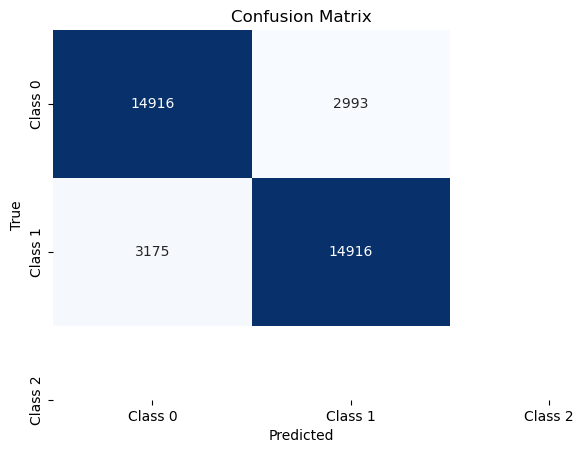

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=['Class 0', 'Class 1', 'Class 2'],
yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.905345309149707


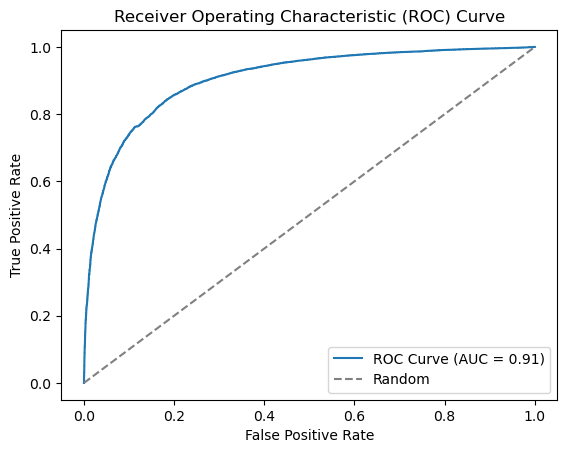

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_probs = y_pred_probs[:, 1]

# 计算 ROC 曲线的参数
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# 计算 AUC
auc = roc_auc_score(y_test, y_pred_probs)
print('AUC:', auc)

# 绘制 ROC 曲线
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, classification_report

# 创建决策树分类器实例
decision_tree_model = DecisionTreeClassifier(random_state=42)

# 训练模型
decision_tree_model.fit(X_train, y_train)

# 评估模型
y_pred = decision_tree_model.predict(X_test)
y_pred_probs = decision_tree_model.predict_proba(X_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
accuracys.append(accuracy)
# 计算召回率
recall = recall_score(y_test, y_pred)
recalls.append(recall)
# 计算精确率
precision = precision_score(y_test, y_pred)
precisions.append(precision)
# 计算 F1 分数
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

print(f'{accuracy},{recall},{precision},{f1}')


0.7692777777777777,0.7694986457354486,0.7709475549648336,0.77022241894434


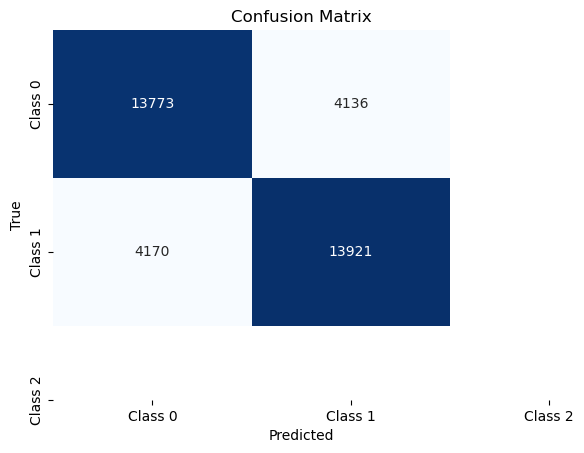

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=['Class 0', 'Class 1', 'Class 2'],
yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.7692766554937782


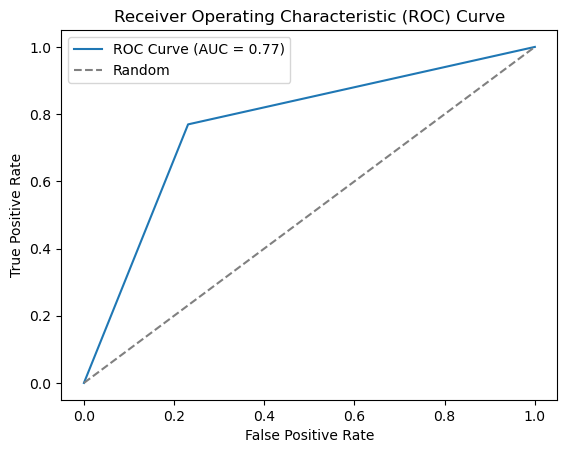

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_probs = y_pred_probs[:, 1]

# 计算 ROC 曲线的参数
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# 计算 AUC
auc = roc_auc_score(y_test, y_pred_probs)
print('AUC:', auc)

# 绘制 ROC 曲线
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, classification_report

# 创建随机森林分类器实例
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
random_forest_model.fit(X_train, y_train)

# 评估模型
y_pred = random_forest_model.predict(X_test)
y_pred_probs = random_forest_model.predict_proba(X_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
accuracys.append(accuracy)
# 计算召回率
recall = recall_score(y_test, y_pred)
recalls.append(recall)
# 计算精确率
precision = precision_score(y_test, y_pred)
precisions.append(precision)
# 计算 F1 分数
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

print(f'{accuracy},{recall},{precision},{f1}')

0.8451111111111111,0.8401415068265988,0.8499133255046692,0.8449991660643797


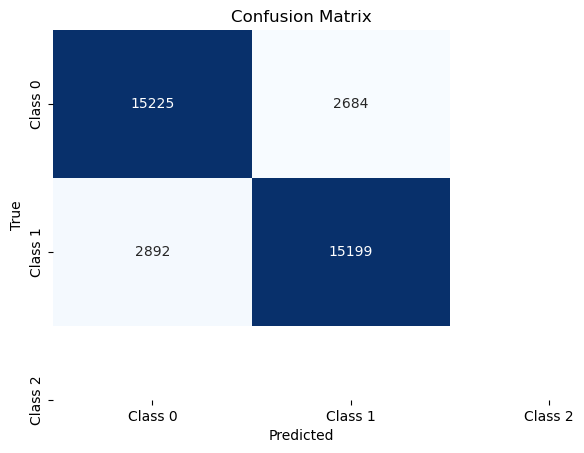

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=['Class 0', 'Class 1', 'Class 2'],
yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.9267917955643798


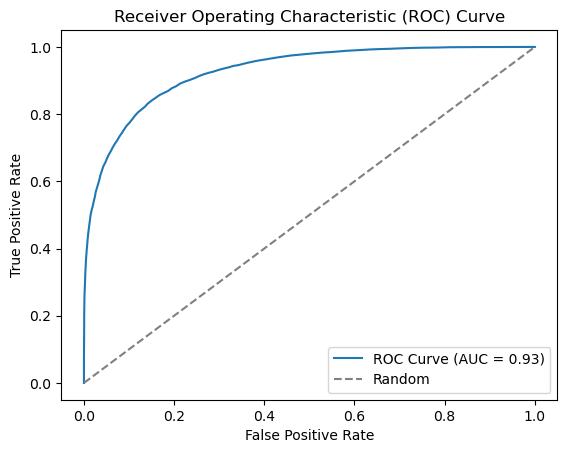

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_probs = y_pred_probs[:, 1]

# 计算 ROC 曲线的参数
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# 计算 AUC
auc = roc_auc_score(y_test, y_pred_probs)
print('AUC:', auc)

# 绘制 ROC 曲线
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, classification_report

# 创建梯度提升机分类器实例
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 训练模型
gradient_boosting_model.fit(X_train, y_train)

# 评估模型
y_pred = gradient_boosting_model.predict(X_test)
y_pred_probs = gradient_boosting_model.predict_proba(X_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
accuracys.append(accuracy)
# 计算召回率
recall = recall_score(y_test, y_pred)
recalls.append(recall)
# 计算精确率
precision = precision_score(y_test, y_pred)
precisions.append(precision)
# 计算 F1 分数
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

print(f'{accuracy},{recall},{precision},{f1}')


0.8395833333333333,0.8410259244928417,0.8399580435022634,0.8404916448004418


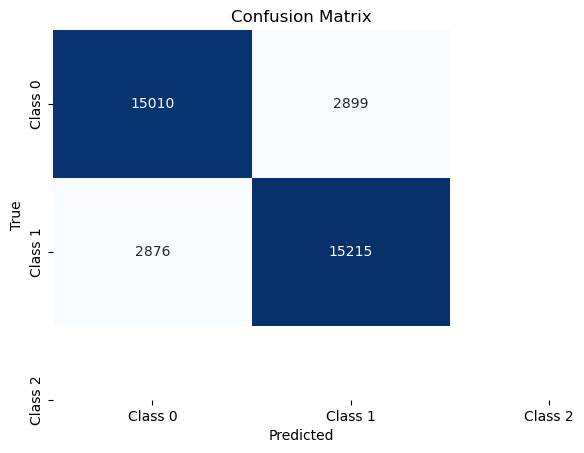

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=['Class 0', 'Class 1', 'Class 2'],
yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.9232495707706654


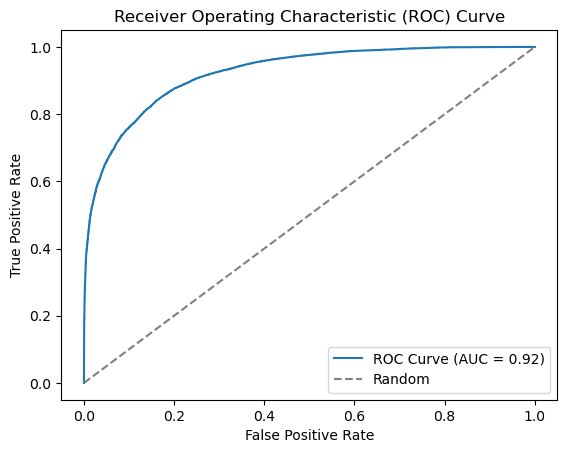

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_probs = y_pred_probs[:, 1]

# 计算 ROC 曲线的参数
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# 计算 AUC
auc = roc_auc_score(y_test, y_pred_probs)
print('AUC:', auc)

# 绘制 ROC 曲线
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, classification_report

# 创建决策树分类器作为AdaBoost的基分类器
estimator = DecisionTreeClassifier(max_depth=1)

# 创建AdaBoost模型实例，使用新的参数名称
ada_boost_model = AdaBoostClassifier(
    estimator=estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
# 训练模型
ada_boost_model.fit(X_train, y_train)

# 预测测试集
y_pred = ada_boost_model.predict(X_test)
y_pred_probs = ada_boost_model.predict_proba(X_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
accuracys.append(accuracy)
# 计算召回率
recall = recall_score(y_test, y_pred)
recalls.append(recall)
# 计算精确率
precision = precision_score(y_test, y_pred)
precisions.append(precision)
# 计算 F1 分数
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

print(f'{accuracy},{recall},{precision},{f1}')

0.8218611111111112,0.8142170139848544,0.8283657631312563,0.8212304518718815


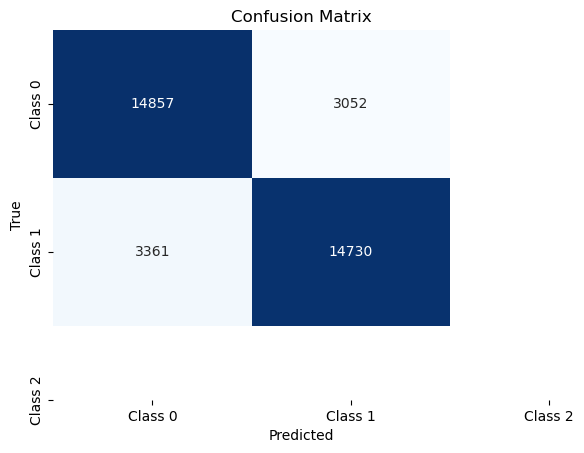

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=['Class 0', 'Class 1', 'Class 2'],
yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.9080099528716659


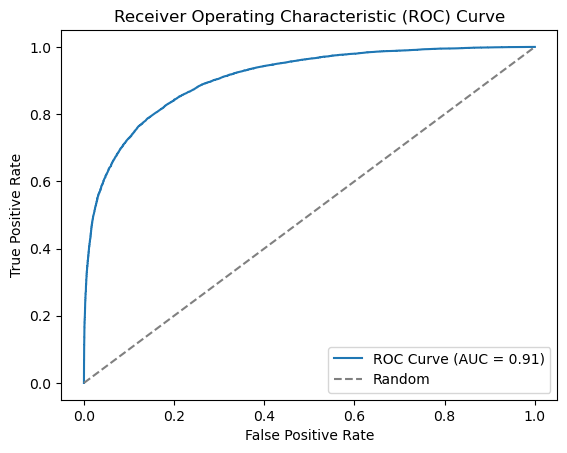

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_probs = y_pred_probs[:, 1]

# 计算 ROC 曲线的参数
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# 计算 AUC
auc = roc_auc_score(y_test, y_pred_probs)
print('AUC:', auc)

# 绘制 ROC 曲线
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [25]:
print(accuracys,precisions,recalls,f1s)

[0.8286666666666667, 0.7692777777777777, 0.8451111111111111, 0.8395833333333333, 0.8218611111111112] [0.8328773242503769, 0.7709475549648336, 0.8499133255046692, 0.8399580435022634, 0.8283657631312563] [0.8244983693549278, 0.7694986457354486, 0.8401415068265988, 0.8410259244928417, 0.8142170139848544] [0.8286666666666666, 0.77022241894434, 0.8449991660643797, 0.8404916448004418, 0.8212304518718815]


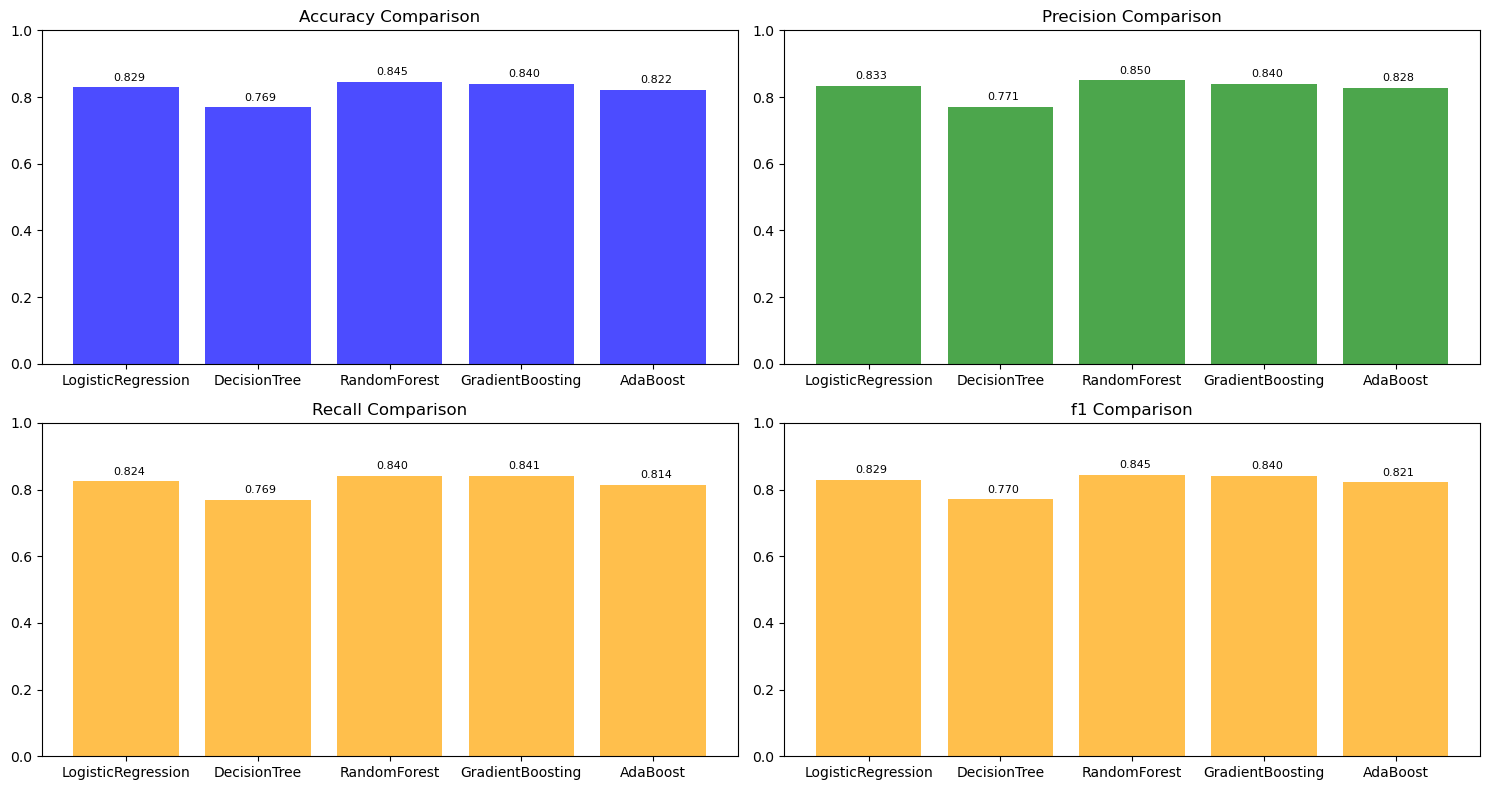

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
# 绘制比较图
models = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting','AdaBoost']

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
bars = plt.bar(models, accuracys, color='blue', alpha=0.7)
plt.title('Accuracy Comparison')
plt.ylim([0, 1])

for bar, score in zip(bars, accuracys):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{score:.3f}', fontsize=8)

plt.subplot(2, 2, 2)
bars = plt.bar(models, precisions, color='green', alpha=0.7)
plt.title('Precision Comparison')
plt.ylim([0, 1])

for bar, score in zip(bars, precisions):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{score:.3f}', fontsize=8)

plt.subplot(2, 2, 3)
bars = plt.bar(models, recalls, color='orange', alpha=0.7)
plt.title('Recall Comparison')
plt.ylim([0, 1])

for bar, score in zip(bars, recalls):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{score:.3f}', fontsize=8)

plt.subplot(2, 2, 4)
bars = plt.bar(models, f1s, color='orange', alpha=0.7)
plt.title('f1 Comparison')
plt.ylim([0, 1])

for bar, score in zip(bars, f1s):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{score:.3f}', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
processed_train

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 加载数据集

df=pd.read_csv('processed_train.csv')
# 选择特征和标签
df = df.fillna(0)  # 将NaN值替换为0
X = df.drop('win', axis=1) # 使用除了 'win' 以外的所有列作为特征


y = df['win']  # 'win' 列作为标签

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建逻辑回归模型实例，增加最大迭代次数
logistic_regression_model = LogisticRegression(max_iter=1000)

# 训练模型
logistic_regression_model.fit(X_train_scaled, y_train)

# 预测测试集
y_pred = logistic_regression_model.predict(X_test_scaled)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy}')

Logistic Regression Model Accuracy: 0.7470277777777777


In [22]:
from sklearn.tree import DecisionTreeClassifier

# 创建决策树分类器实例
decision_tree_model = DecisionTreeClassifier(random_state=42)

# 训练模型
decision_tree_model.fit(X_train, y_train)

# 评估模型
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Model Accuracy: {accuracy}')

Decision Tree Model Accuracy: 0.6890277777777778


In [23]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器实例
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
random_forest_model.fit(X_train, y_train)

# 评估模型
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy}')

Random Forest Model Accuracy: 0.7667222222222222


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# 创建梯度提升机分类器实例
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 训练模型
gradient_boosting_model.fit(X_train, y_train)

# 评估模型
y_pred = gradient_boosting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Model Accuracy: {accuracy}')

Gradient Boosting Model Accuracy: 0.7658055555555555


In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 创建决策树分类器作为AdaBoost的基分类器
estimator = DecisionTreeClassifier(max_depth=1)

# 创建AdaBoost模型实例，使用新的参数名称
ada_boost_model = AdaBoostClassifier(
    estimator=estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
# 训练模型
ada_boost_model.fit(X_train, y_train)

# 预测测试集
y_pred = ada_boost_model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'AdaBoost Model Accuracy: {accuracy}')

AdaBoost Model Accuracy: 0.7581111111111111
